In [1]:
# import general packages
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import dill
import multiprocessing as mp
from tqdm import tqdm

In [4]:
# Import stochastic model from repository
import os
import sys
sys.path.append('..')
import models.mutation as mutation

In [5]:
# Create path for exporting fit plots
path = '../Plots/Mutation CBD/'
if not os.path.exists(path):
    os.makedirs(path)

# Modelling the evolution of mutations acquired in SCs

100%|██████████| 10000/10000 [08:26<00:00, 19.74it/s] 


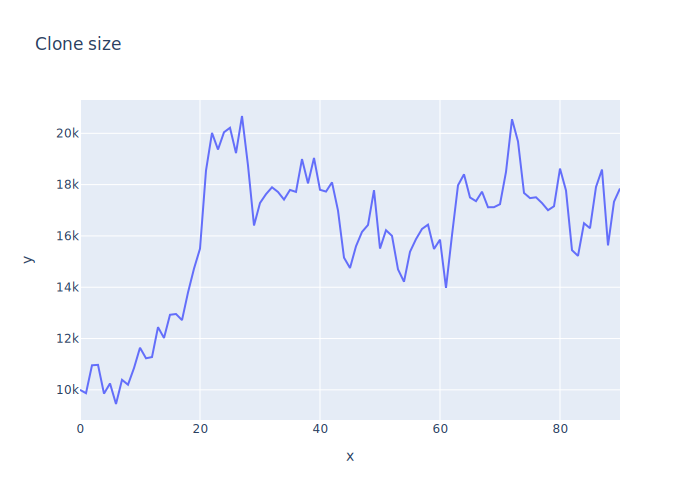

In [6]:
# Set number of initial cells to be simulated
init_cells = 10_000
init_tmax = [90]*init_cells

# Fit trajectories for each participant with multiprocessing.
np.random.seed(123)
if __name__ == '__main__':
    with mp.Pool(25) as p:
        clone_track = list(tqdm(p.imap(mutation.clonal_evolution, init_tmax), total=len(init_tmax)))


# Compute total number of cells in the system at each year
total_cells = np.array([clone[:, 0] for clone in clone_track])
total_cells = total_cells.sum(axis=0)

# Plot total cells in the system
fig_total_cells = px.line(title='Clone size',
                          x=list(range(total_cells.shape[0])),
                          y=total_cells)

fig_total_cells.show(renderer='svg')

In [6]:
with open('../Resources/CDB mutations.dill', 'wb') as outfile:
    dill.dump(clone_track, outfile)

# Plots

In [4]:
with open('../Resources/CDB mutations.dill', 'rb') as infile:
    clone_track = dill.load(infile)

## Filtering associated functions

# Single initial cell trajectory

In [6]:
filter_track = [clone for clone in clone_track if clone.shape[1]>1]


clone = filter_track[0]

filtered_clone = clonal_evolution.filter_clone(clone)
filtered_clone = clonal_evolution.delete_ghosts (filtered_clone)
mutations = filtered_clone[:,1:]
max_year = mutations.shape[0] -1

fig = go.Figure()
x = np.linspace(0, max_year, max_year+1)
# add jitter to mutations:
#mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)

# add_ total_cells
fig.add_trace(
    go.Scatter(x =x, y = filtered_clone[:,0], mode='lines', fill='tozeroy', fillcolor='rgba(184, 247, 212,0.3)',
               line=dict(width=1,color='rgb(184, 247, 212)'),
               name='total cells'))


fig.add_trace(
    go.Scatter(x=[0], y=[0],
               mode='lines',
               line=dict(color="Black"),
               name='Genetic Variants',
              # legendgroup_text='hola',
               legendgroup='Genetic variants'))

for col in range(mutations.shape[1]):
    fig.add_trace(
        go.Scatter(x=x, y=mutations[:, col], mode='lines', showlegend=False))


fig.update_layout(template='plotly_white',
                  title='Stochastic evolution of genetic clones from initial HSC',
                  xaxis_title='Years',
                  yaxis_title='Cell counts')
#fig.write_image(path + 'single_cell_evolution.png', scale=5)
fig.show()

AttributeError: 'function' object has no attribute 'filter_clone'

## Full simulation cell counts

In [15]:
fig = go.Figure()

filter_track = [clone for clone in clone_track if clone.shape[1]>1]
for clone in filter_track:
    filtered_clone = filter_clone (clone)
    filtered_clone = delete_ghosts (filtered_clone)
    mutations = filtered_clone[:,1:]
    max_year = mutations.shape[0] -1
    x = np.linspace(0, max_year, max_year+1)
    # add jitter to mutations:
    #mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)
    
    for col in range(mutations.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=mutations[:, col], mode='lines', showlegend=False))

fig.update_layout(template='plotly_white',
                  title='Evolution of neutral clones',
                  xaxis_title='Years',
                  yaxis_title='Cell counts')
#fig.write_image(path + '10_000_SC_simulation.png', scale=5)

# Simulating the effect of SC on VAF evolution

In [12]:
N_cells = 10_000

fig = go.Figure()

filter_track = [clone for clone in clone_track if clone.shape[1]>1]
for clone in filter_track:
    filtered_clone = filter_clone (clone)
    filtered_clone = delete_ghosts (filtered_clone)
    mutations = filtered_clone[:,1:]
    max_year = mutations.shape[0] -1
    x = np.linspace(0, max_year, max_year+1)
    # add jitter to mutations:
    #mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)
    
    for col in range(mutations.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=mutations[:, col]/(2*N_cells), mode='lines', showlegend=False))

# horizontal sequencing threshold
fig.add_hrect(y0=0, y1=0.01, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(template='plotly_white',
                  title='Evolution of neutral clones',
                  xaxis_title='Years',
                  yaxis_title='VAF',
                  yaxis_range=[0,0.05])

fig.write_image(path + '10_000_VAF.png', scale=5)

In [13]:
N_cells = 100_000

fig = go.Figure()

filter_track = [clone for clone in clone_track if clone.shape[1]>1]
for clone in filter_track:
    filtered_clone = filter_clone (clone)
    filtered_clone = delete_ghosts (filtered_clone)
    mutations = filtered_clone[:,1:]
    max_year = mutations.shape[0] -1
    x = np.linspace(0, max_year, max_year+1)
    # add jitter to mutations:
    #mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)
    
    for col in range(mutations.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=mutations[:, col]/(2*N_cells), mode='lines', showlegend=False))

# horizontal sequencing threshold
fig.add_hrect(y0=0, y1=0.01, line_width=0, fillcolor="red", opacity=0.2)

        
        
fig.update_layout(template='plotly_white',
                  title='Evolution of neutral clones',
                  xaxis_title='Years',
                  yaxis_title='VAF',
                  yaxis_range=[0,0.05])

fig.write_image(path + '100_000_VAF.png', scale=5)

In [14]:
N_cells = 6_000

fig = go.Figure()

filter_track = [clone for clone in clone_track if clone.shape[1]>1]
for clone in filter_track:
    filtered_clone = filter_clone (clone)
    filtered_clone = delete_ghosts (filtered_clone)
    mutations = filtered_clone[:,1:]
    max_year = mutations.shape[0] -1
    x = np.linspace(0, max_year, max_year+1)
    # add jitter to mutations:
    #mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)
    
    for col in range(mutations.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=mutations[:, col]/(2*N_cells), mode='lines', showlegend=False))

# horizontal sequencing threshold
fig.add_hrect(y0=0, y1=0.01, line_width=0, fillcolor="red", opacity=0.2)

fig.update_layout(template='plotly_white',
                  title='Evolution of neutral clones',
                  xaxis_title='Years',
                  yaxis_title='VAF',
                  yaxis_range=[0,0.05])
fig.write_image(path + '6_000_VAF.png', scale=5)

In [57]:
N_cells = 385

fig = go.Figure()

filter_track = [clone for clone in clone_track if clone.shape[1]>1]
for clone in filter_track:
    filtered_clone = filter_clone (clone)
    filtered_clone = delete_ghosts (filtered_clone)
    mutations = filtered_clone[:,1:]
    max_year = mutations.shape[0] -1
    x = np.linspace(0, max_year, max_year+1)
    # add jitter to mutations:
    #mutations = mutations + np.random.normal(scale=0.5, size=mutations.shape)
    
    for col in range(mutations.shape[1]):
        fig.add_trace(
            go.Scatter(x=x, y=mutations[:, col]/(2*N_cells), mode='lines', showlegend=False))

# horizontal sequencing threshold
fig.add_hrect(y0=0, y1=0.01, line_width=0, fillcolor="red", opacity=0.2)

fig.update_layout(template='plotly_white',
                  title='Evolution of neutral clones',
                  xaxis_title='Years',
                  yaxis_title='VAF',
                  yaxis_range=[0,0.05])
fig.write_image(path + '385_VAF.png', scale=5)